In [1]:
%pylab inline

import behav
import behav.utils as utils
from behav import plotting, loading
data_path = '/mnt/cube/RawData/Magpi/'

Populating the interactive namespace from numpy and matplotlib


In [2]:
subjects = [
    "B1176", # doesn't work
    "B1440", # doesn't work
    "B1170", # doesn't work
    "B1426",
    "B1432"
    ]

## Loads Data

In [3]:
%%time
behav_data = behav.loading.load_data_pandas(subjects,data_path)

/home/AD/acmai/anaconda3/lib/python3.6/site-packages/IPython/core/magic.py:187: DtypeWarning: Columns (8) have mixed types. Specify dtype option on import or set low_memory=False.
  call = lambda f, *a, **k: f(*a, **k)


CPU times: user 37.4 s, sys: 2.36 s, total: 39.8 s
Wall time: 28.4 s


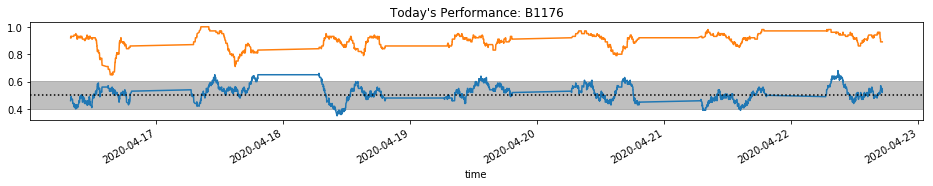

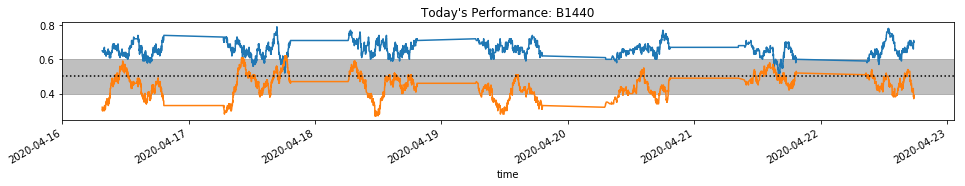

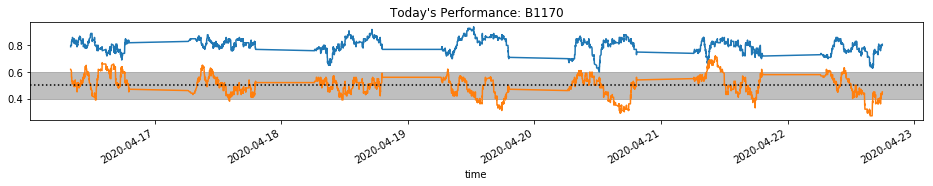

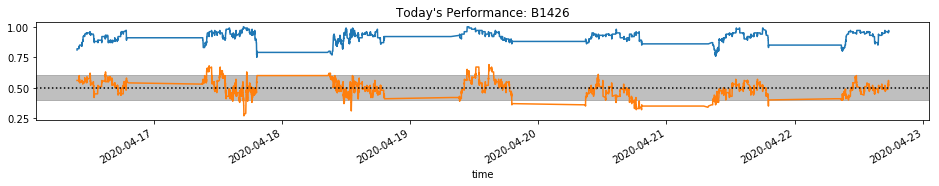

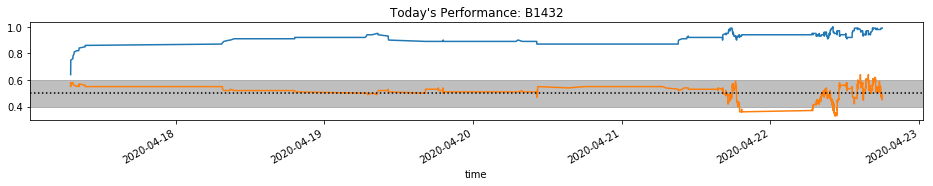

In [6]:
for subj, data in behav_data.items():
    behav.plotting.plot_ci_accuracy(subj, data)

In [7]:
for subj, data in behav_data.items():
    print(data.index.hour)

Int64Index([12, 12, 13, 13, 13, 13, 13, 13, 13, 13,
            ...
            13, 13, 13, 13, 13, 13, 13, 13, 13, 13],
           dtype='int64', name='time', length=193357)


In [6]:
for subj, data in behav_data.items():
    print(subj, data.response.unique(), data.class_.unique())

B1176 ['none' 'R' 'L' 'right' 'left'] ['L' 'R']
B1440 ['none' 'left' 'right'] ['L' 'R']
B1170 ['none' 'R' 'L' 'right' 'left'] ['L' 'R']
B1426 ['none' 'R' 'L'] ['R' 'L']
B1432 ['none' 'R' 'L'] ['R' 'L']


In [66]:
print(behav_data)

{'B1440':                             session  index       type_  \
time                                                     
2019-05-22 10:51:48.724176        1      0      normal   
2019-05-23 19:11:09.937490        1      0      normal   
2019-05-23 19:12:58.481264        1      1      normal   
2019-05-23 19:13:53.686248        1      2      normal   
2019-05-23 19:14:05.065187        1      3      normal   
2019-05-23 19:14:16.616046        1      4      normal   
2019-05-23 19:14:40.286511        1      5      normal   
2019-05-23 19:15:02.012866        1      6      normal   
2019-05-23 19:15:55.458638        1      7  correction   
2019-05-23 19:16:32.209649        1      8  correction   
2019-05-23 19:16:42.943857        1      9  correction   
2019-05-23 19:16:52.529075        1     10      normal   
2019-05-23 19:17:04.998088        1     11      normal   
2019-05-23 19:17:19.641813        1     12      normal   
2019-05-23 19:17:33.481574        1     13      normal   
2019

## plot performance over past two weeks in calendar

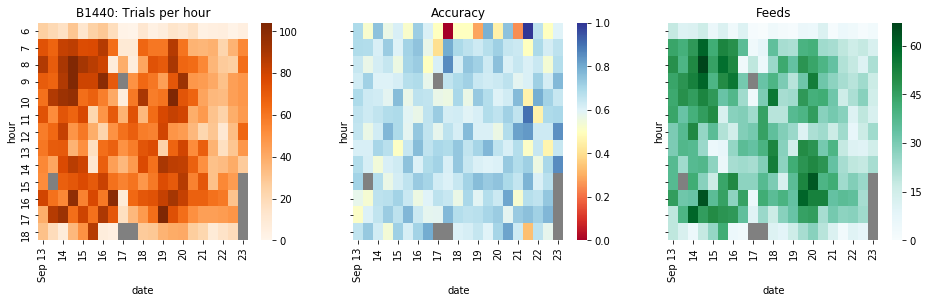

In [67]:
from importlib import reload
reload(plotting)
for subj,data in behav_data.items():
    behav.plotting.plot_filtered_performance_calendar(subj,data,num_days=20)    

##plot accuracy per stim

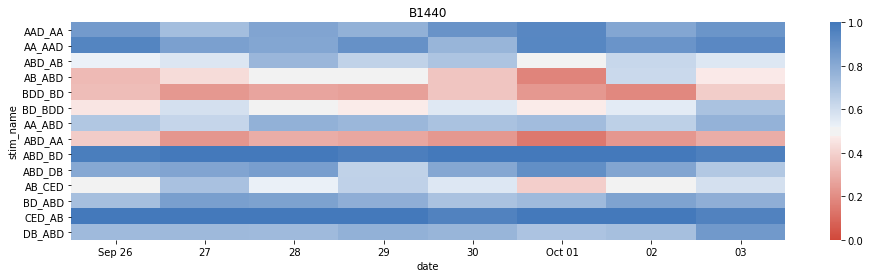

In [68]:
figsize(16.0, 4.0)
for subj,df in behav_data.items():
    behav.plotting.loc(subj, df, extract_stim_names=True)

## Plot percent correct by block with confidence bounds

In [ ]:
for subj,df in behav_data.items():
    behav.plotting.plot_ci_accuracy(subj, df)

##plot accuracy today

In [ ]:
for subj,df in behav_data.items():
    behav.plotting.plot_daily_accuracy(subj, df, x_axis='trial_num')

# Plot number of trials and feeds for past week

In [ ]:
behav.plotting.plot_trial_feeds(behav_data)